In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Data preprocessing


In [2]:
types = ['t1_c1', 't1_c2', 't2_c1', 't2_c2']
labels = ['T=1 C=1', 'T=1 C=2', 'T=2 C=1', 'T=2 C=2']
markers = ['o', 's', '^', '<']
cycles = range(1,4)
base = '../data/part_4_1/'
paths = ["mcperf_"+type+"_"+str(cycle)+".txt" for type in types for cycle in cycles]
print(paths)

['mcperf_t1_c1_1.txt', 'mcperf_t1_c1_2.txt', 'mcperf_t1_c1_3.txt', 'mcperf_t1_c2_1.txt', 'mcperf_t1_c2_2.txt', 'mcperf_t1_c2_3.txt', 'mcperf_t2_c1_1.txt', 'mcperf_t2_c1_2.txt', 'mcperf_t2_c1_3.txt', 'mcperf_t2_c2_1.txt', 'mcperf_t2_c2_2.txt', 'mcperf_t2_c2_3.txt']


# Plot

In [ ]:
# plt.figure(figsize=(10,4.6))
for i in range(len(paths)//3):
    qps = pd.DataFrame({f'cycle{j}': pd.read_csv(base+paths[i*3+j], delim_whitespace=True)['QPS'] for j in range(3)})
    p95 = pd.DataFrame({f'cycle{j}': pd.read_csv(base+paths[i*3+j], delim_whitespace=True)['p95'] / 1000 for j in range(3)})
    # fig_ax.errorbar(
    plt.errorbar(
        x=qps.mean(axis=1),
        y=p95.mean(axis=1),
        # xerr=qps.std(axis=1),
        yerr=p95.std(axis=1),
        label=labels[i],
        marker=markers[i],
        markersize=4,
        # markerfacecolor="none",
        capsize=4
    )
plt.title("Memcached P95 latency averaged across 3 runs", fontsize=16, pad=10)
plt.xlabel("QPS", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
plt.tick_params(labelsize=12)
# plt.xlim(left=0, right=55000)
plt.ylim(bottom=0, top=2.5)
# plt.yticks(range(0, 4, 1))
xticks = [0,20000,40000,60000,80000,100000,120000,140000]
plt.xticks(xticks, [f'{x // 1000}k' for x in xticks])
# Save plot
# plt.tight_layout()
plt.savefig("../figure/part_4_1.pdf")

cpu0
[0.6, 1.2, 1.9, 8.3, 32.8, 46.8, 59.2, 65.3, 69.2, 76.8, 77.7, 84.7, 90.9, 95.3, 99.5, 100.0, 100.0, 100.0, 93.0, 100.0, 100.0, 100.0, 99.5, 94.0, 100.0]


/tmp/ipykernel_11970/699696116.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  qps = pd.read_csv(base+path_mcperf, delim_whitespace=True)['QPS']
/tmp/ipykernel_11970/699696116.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  p95 = pd.read_csv(base+path_mcperf, delim_whitespace=True)['p95'] / 1000
/tmp/ipykernel_11970/699696116.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_s = pd.read_csv(base+path_mcperf, delim_whitespace=True)['ts_start']
/tmp/ipykernel_11970/699696116.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_e = pd.read_csv(base+path_mcperf, delim_whitespace=True)['ts_

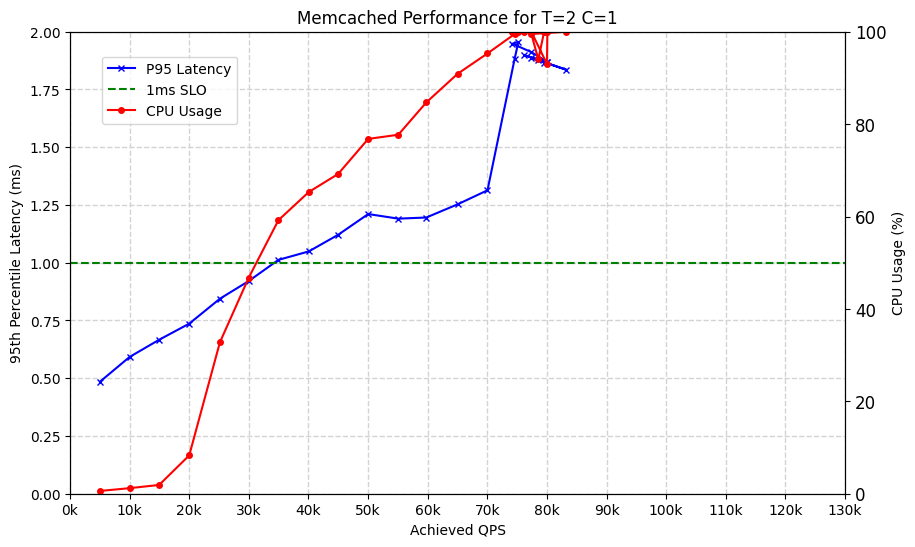

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
sel = 1
base = '../data/part_4_1/'
path_mcperf = "mcperf_t2_c%s_cpu_1.txt"  % sel
path_cpu = "cpu_usage.csv"
qps = pd.read_csv(base+path_mcperf, delim_whitespace=True)['QPS']
p95 = pd.read_csv(base+path_mcperf, delim_whitespace=True)['p95'] / 1000
ts_s = pd.read_csv(base+path_mcperf, delim_whitespace=True)['ts_start']
ts_e = pd.read_csv(base+path_mcperf, delim_whitespace=True)['ts_end']
tmp = 'cpu0' if sel == 1 else 'cpu01'
print(tmp)
cpu_raw = pd.read_csv(base+path_cpu)[tmp]
ts = pd.read_csv(base+path_cpu)['timestamp'] * 1000

cpu = []
j = 0
for i in range(len(qps)):
    while not (ts[j] > ts_s[i]+1000 and ts[j] < ts_e[i]-2000):
        j += 1
    cpu.append(cpu_raw[j])

print(cpu)
    
# Example data (replace these with actual arrays)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting QPS vs 95th percentile latency (left y-axis)
ax1.plot(qps, p95, 'b', marker='x', label='P95 Latency', markersize=4)
ax1.set_xlabel('Achieved QPS')
ax1.set_ylabel('95th Percentile Latency (ms)')
ax1.tick_params('y')
ax1.axhline(y=1.0, color='g', linestyle='--', label='1ms SLO')
ax1.set_ylim(0,2)

# Creating a second y-axis for CPU usage
ax2 = ax1.twinx()
ax2.plot(qps, cpu, 'r', marker='o', label='CPU Usage', markersize=4)
ax2.set_ylabel('CPU Usage (%)')
ax2.tick_params('y')
ax2.set_ylim(0, 100 * sel)

# Adding legend
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85)) #loc='upper left'


plt.tick_params(labelsize=12)
# plt.xlim(left=0, right=55000)
# plt.ylim(bottom=0, top=2.5)
# plt.yticks(range(0, 4, 1))
xticks = range(0, 130001, 10000)
plt.xticks(xticks, [f'{x // 1000}k' for x in xticks])
ax1.grid(True, color='lightgray', linestyle='--', linewidth=1)
# Showing plot
plt.title('Memcached Performance for T=2 C=%s' % sel)
plt.show()

fig.savefig('../figure/part_4_1_d%s_1.pdf' % sel)
